# Value Class & Graph with nodes and edges exaple
**Problem to be solved:** We need a datastructure that can be used for creating a graph like the one below. An int holds the number value, but we need to know the variable name connected to the object, the parrent objects used to create the new object, and the operands also used to create the object. So all this historical data can not be stored in an **int**. Therefore we need to create a new more complex object. 

The following is a OOP example of how to create a class and an object using the pythonic approch of doing so.     
The Value class is basically an **int** or a **float class**, but since we in this case need more attributes, we need to create our own class with the aditional attributes. Still this object should be able to perform the same actions. in this case we fokus on: +,*,-,/    

* **data** holds the number. (This is like in an _int_ class)    

The 3 following attributes is what differs from an int object, and this is what we need in order to create the graph diagram at the bottom.      

* **_prev** is a set with the Values parrents. A reference to the 2 or more object that where added, multiplied, substracted or divided    
* **_op** is the operator used when creating the object from the 2 or more parrents. (+,*,-,/)     
* **label** is the variable name given when creating the object. 

In [7]:
# Install graphviz on you computer: https://graphviz.org/download/
# install requirement packages in this project
%pip install graphviz

#import into this project
from graphviz import Digraph


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
class Value:
  
    def __init__(self, data, _parents=(), _operator='', label=''):
        self.data = data                # the actual value
        self._prev = set(_parents)      # the 2 or more object used to create the object
        self._op = _operator            # the operator used when creating the object (+,-,*,/)
        self.label = label              # The variable name connected to the object

    def __repr__(self):
        return f"Value(data={self.data})"
  
    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')

    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')

    def __sub__(self, other):
        return Value(self.data - other.data, (self, other), '-')
  
    def __truediv__(self, other):
        if other.data == 0:  # Division by zero check
            raise ValueError("Division by zero is not allowed")
        return Value(self.data / other.data, (self, other), '/')

In [14]:
# These 2 functions are not super important for you to look at right now. The fokus should be on the Value class. 
# But basicly what the 2 functions do are to produce the graph below with its nodes and edges. 
# If you later look through the code step by step, you should by now be able to understand what it does. 
# If not it is a good exercise to do so. 

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    
    build(root)
    
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
    
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name=uid, label=f"{{ {n.label} | data {n.data:.1f} }}", shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name=uid + n._op, label=n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

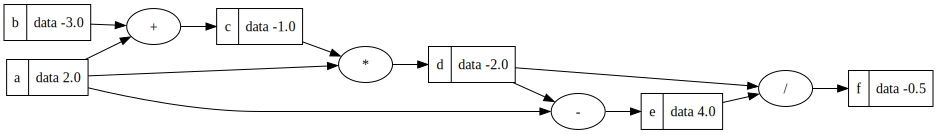

In [10]:
a = Value(2, label='a')
b = Value(-3, label='b')
c = a + b; c.label='c'
d = a * c; d.label = 'd'
e = a - d; e.label = 'e'
f = d / e; f.label = 'f'

draw_dot(f)

### This show the methods in an int class

In [11]:
help(int)

Help on class int in module builtins:

class int(object)
 |  int([x]) -> integer
 |  int(x, base=10) -> integer
 |  
 |  Convert a number or string to an integer, or return 0 if no arguments
 |  are given.  If x is a number, return x.__int__().  For floating point
 |  numbers, this truncates towards zero.
 |  
 |  If x is not a number or if base is given, then x must be a string,
 |  bytes, or bytearray instance representing an integer literal in the
 |  given base.  The literal can be preceded by '+' or '-' and be surrounded
 |  by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
 |  Base 0 means to interpret the base from the string as an integer literal.
 |  >>> int('0b100', base=0)
 |  4
 |  
 |  Built-in subclasses:
 |      bool
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __and__(self, value, /)
 |      Return self&value.
 |  
 |  __bool__(self, /)
 |      True if 